In [1]:
from sklearn import datasets  
#This package helps to fetch larger datasets
import numpy as np   
#Array-Processing package
from matplotlib import pyplot as plt 
# A collection of command style function that make.
#Matplotlib work like MATLAB

In [2]:
x,y = datasets.make_blobs(n_samples=150,n_features=2,cluster_std=1.05,centers=2,random_state=2)
#Generate Gaussian blobs for clustering. Blobs function used to generate any number of blobs and th no.of.samples
#n_samples => No.of.Points equally divided
#n_features => No.of.features
#cluster_std = std-standard deviation of the cluster
#random_state = Determine random number generation for dataset creation

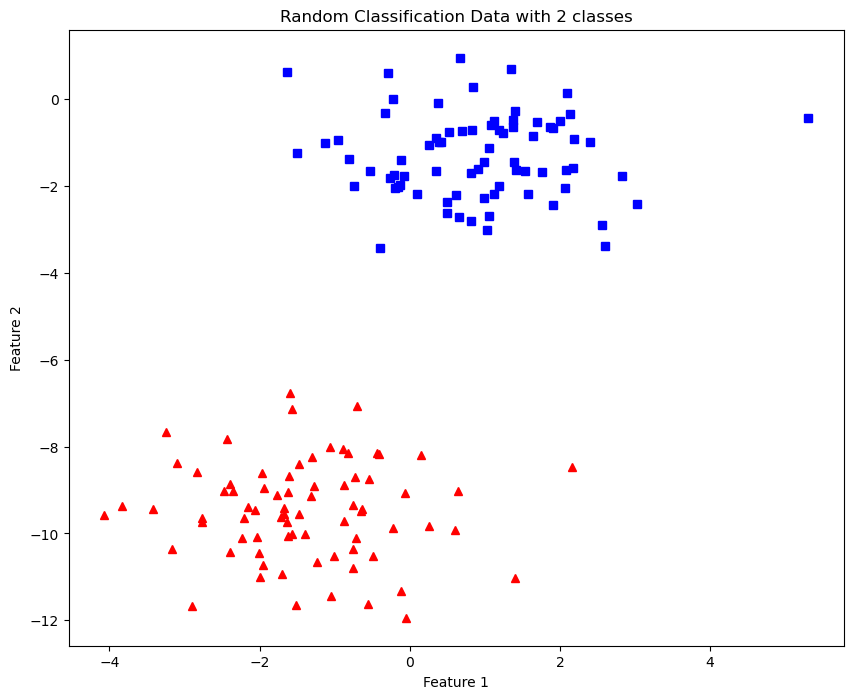

In [3]:
plt.figure(figsize=(10,8))
#figsize is a tuple of width and height
plt.plot(x[:,0][y==0],x[:,1][y==0],"r^")
#x[:,0][y==0] denotes that in array x,it plot values from all rows and 0th column only if the corresponding y value is equal to 0
plt.plot(x[:,0][y==1],x[:,1][y==1],'bs')
#x[:,0][y==0] denotes that in array x,it plot values from all rows and 0th column only if the corresponding y value is equal to 1
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Random Classification Data with 2 classes")
plt.show()

In [4]:
def step_func(z):
    return 1.0 if (z>0) else 0.0

def preceptron(x,y,lr,epochs):
    m,n = x.shape 
    #Assigning the shape of x to m and n (150,2)
    theta = np.zeros((n+1,1))
    #zeros() function returns a new array with n+1 rows and 1 columns with zero
    n_miss_list = []
    #An Empty List to store how many examples we are misclassified
    for epoch in range(epochs):
        n_miss = 0 #Variable to store misclassified
        for idx,x_i in enumerate(x):
            x_i = np.insert(x_i,0,1).reshape(-1,1)
            #Insert() function used to insert a given element at the given index : Here Element '1' is need to be installed at 0th index
            y_hat = step_func(np.dot(x_i.T,theta))
            if (y_hat - y[idx] != 0): #Checking whether prediction and actual or same
                theta += lr * ((y[idx] - y_hat)*x_i)  #if not,updating the theta(Weight)
                n_miss += 1  #Increasing the miss count
        n_miss_list.append(n_miss)
    return theta,n_miss_list

In [5]:
def plot_decision_boundary(x,theta):
    #Line Equation : theta0.x0 + theta1.x1 + theta2.x2
    x1 = [min(x[:,0]),max(x[:,0])]
    #min(x[:,0] gets the minimum value of x from 0th column
    #max(x[:,0] gets the maximum value of x from 0th column)
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c

    
    #Plotting
    plt.figure(figsize=(10,8))
    plt.plot(x[:,0][y==0],x[:,1][y==0],"r^")
    plt.plot(x[:,0][y==1],x[:,1][y==1],"bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Perceptron algorithm')
    plt.plot(x1,x2,'g-')
    #'g-' specifies the plot with green color line
    plt.show()

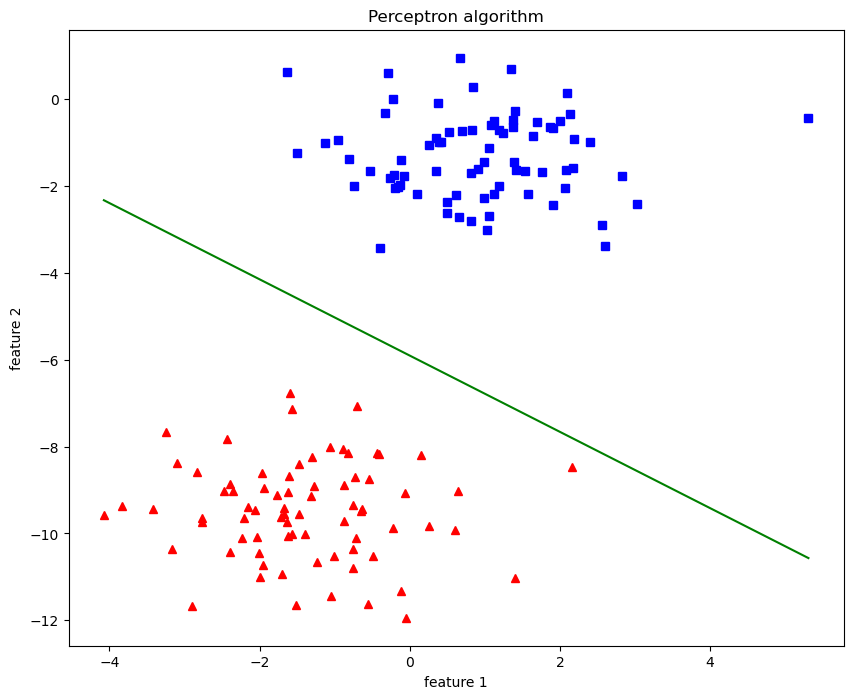

In [6]:
theta,miss_list = preceptron(x,y,0.5,100)
plot_decision_boundary(x,theta)